In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"D:\Python_Works\Dengue Files\ph_dengue_cases2016-2020.csv")

In [4]:
df.head().style.background_gradient(cmap="flare")

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [5]:
df.tail().style.background_gradient(cmap="flare")

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1
1019,December,2020,BARMM,23,0


In [6]:
df.shape

(1020, 5)

In [7]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [9]:
df.describe().style.background_gradient(cmap="flare")

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [10]:
np.unique(df["Region"])

array(['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III',
       'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI',
       'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII',
       'Region XIII'], dtype=object)

Number of Dengue Cases over time

In [11]:
monthyear = []
for month, year in zip(df["Month"], df["Year"]):
    monthyear.append(str(str(year) + "-" + month))

<function matplotlib.pyplot.show(close=None, block=None)>

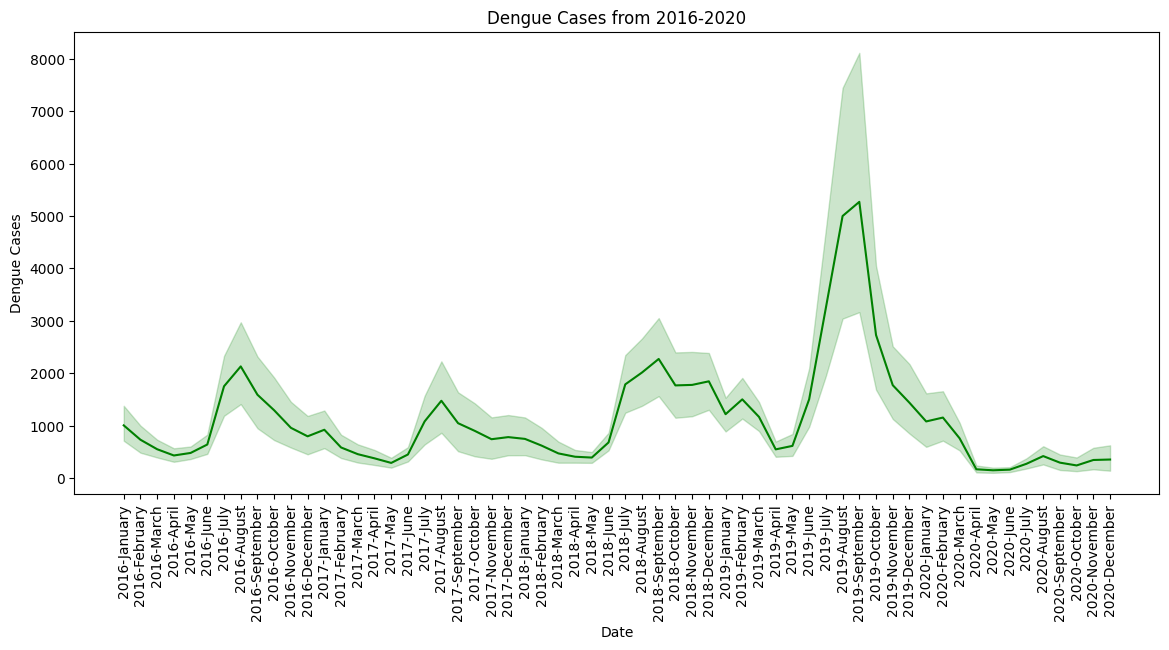

In [31]:
plt.figure(figsize=(14,6))
sns.lineplot(x=monthyear,y=df["Dengue_Cases"], color = "green")
plt.xlabel("Date")
plt.ylabel("Dengue Cases")
plt.title("Dengue Cases from 2016-2020")
plt.xticks(rotation=90)
plt.show

Dengue Cases Per Region

In [13]:
df2 = pd.DataFrame({"Date": monthyear, "Region": df["Region"],
    "Dengue Cases": df["Dengue_Cases"], "Deaths": df["Dengue_Deaths"]})

In [14]:
df2.head().style.background_gradient(cmap="flare")

,Date,Region,Dengue Cases,Deaths
0,2016-January,Region I,705,1
1,2016-February,Region I,374,0
2,2016-March,Region I,276,0
3,2016-April,Region I,240,2
4,2016-May,Region I,243,1


In [15]:
unique_region = []
for region in df2["Region"]:
    if region not in unique_region:
        unique_region.append(region)

In [16]:
case_per_region = []
for region in unique_region:
    region_filt = df2["Region"] == region
    case_in_region = df2[region_filt]["Dengue Cases"].sum()
    case_per_region.append(case_in_region)

df_case_region = pd.DataFrame({"Region": unique_region, 
    "Total Dengue Cases": case_per_region})

In [17]:
df_case_region

,Region,Total Dengue Cases
0,Region I,59066
1,Region II,45141
2,Region III,131064
3,Region IV-A,163029
4,Region IV-B,30849
5,Region V,22167
6,Region VI,117523
7,Region VII,110683
8,Region VIII,51983
9,Region IX,47781


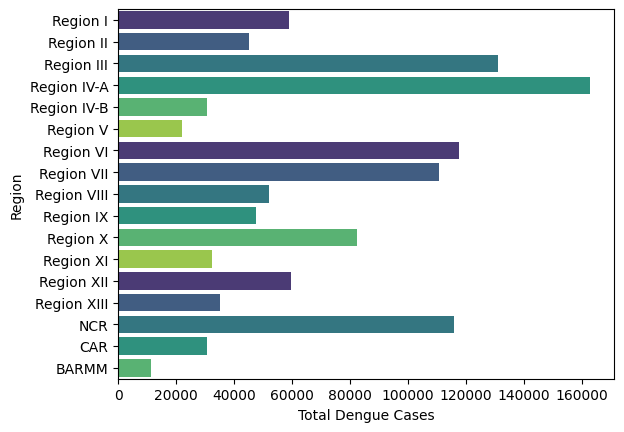

In [18]:

color = sns.color_palette("viridis")
sns.barplot(data = df_case_region, y="Region", 
    x="Total Dengue Cases", palette = color)
plt.show()

How Fatal is Dengue

In [19]:
df2.head(10).style.background_gradient("flare")

,Date,Region,Dengue Cases,Deaths
0,2016-January,Region I,705,1
1,2016-February,Region I,374,0
2,2016-March,Region I,276,0
3,2016-April,Region I,240,2
4,2016-May,Region I,243,1
5,2016-June,Region I,345,1
6,2016-July,Region I,1295,2
7,2016-August,Region I,1598,3
8,2016-September,Region I,1415,3
9,2016-October,Region I,1000,6


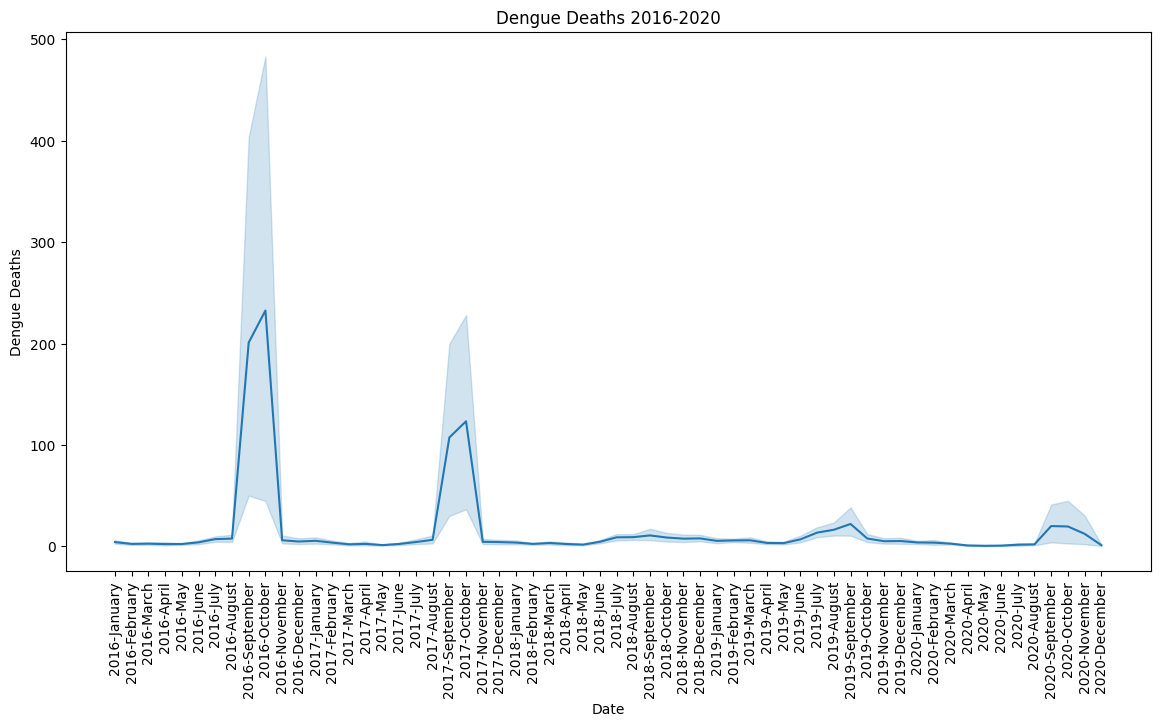

In [20]:
plt.figure(figsize=(14,7))
sns.lineplot(data = df2, x="Date", y="Deaths")
plt.xlabel("Date")
plt.ylabel("Dengue Deaths")
plt.title("Dengue Deaths 2016-2020")
plt.xticks(rotation=90)
plt.show()

Moratality Percentage vs Time

In [21]:
ratios = []
for dengue_death, dengue_case in zip(df2["Deaths"], 
    df2["Dengue Cases"]):
        ratio = (dengue_death/dengue_case)
        ratios.append(ratio)


In [22]:
df2

,Date,Region,Dengue Cases,Deaths
0,2016-January,Region I,705,1
1,2016-February,Region I,374,0
2,2016-March,Region I,276,0
3,2016-April,Region I,240,2
4,2016-May,Region I,243,1
...,...,...,...,...
1015,2020-August,BARMM,91,0
1016,2020-September,BARMM,16,8
1017,2020-October,BARMM,13,9
1018,2020-November,BARMM,15,1


plt.figure(figsize=[14,7])
sns.lineplot(x = df2.index, y = ratios, color = "blue")
plt.xticks(rotation = 90)
plt.xlabel('Dates')
plt.ylabel("Percentage of Fatal Cases")
plt.title("Dengue Deaths from 2016-2020")
plt.show()

In [23]:
unique_date = []
for date in df2["Date"]:
    if date not in unique_date:
        unique_date.append(date)

unique_date


['2016-January',
 '2016-February',
 '2016-March',
 '2016-April',
 '2016-May',
 '2016-June',
 '2016-July',
 '2016-August',
 '2016-September',
 '2016-October',
 '2016-November',
 '2016-December',
 '2017-January',
 '2017-February',
 '2017-March',
 '2017-April',
 '2017-May',
 '2017-June',
 '2017-July',
 '2017-August',
 '2017-September',
 '2017-October',
 '2017-November',
 '2017-December',
 '2018-January',
 '2018-February',
 '2018-March',
 '2018-April',
 '2018-May',
 '2018-June',
 '2018-July',
 '2018-August',
 '2018-September',
 '2018-October',
 '2018-November',
 '2018-December',
 '2019-January',
 '2019-February',
 '2019-March',
 '2019-April',
 '2019-May',
 '2019-June',
 '2019-July',
 '2019-August',
 '2019-September',
 '2019-October',
 '2019-November',
 '2019-December',
 '2020-January',
 '2020-February',
 '2020-March',
 '2020-April',
 '2020-May',
 '2020-June',
 '2020-July',
 '2020-August',
 '2020-September',
 '2020-October',
 '2020-November',
 '2020-December']

In [24]:
ratios = []
for dates in unique_date:
    date_filt = df2["Date"] == dates
    dengue_per_month = df2[date_filt]["Dengue Cases"].sum()
    death_per_month = df2[date_filt]["Deaths"].sum()
    ratio = (death_per_month/dengue_per_month) *100
    ratios.append(ratio)

In [25]:
oct_filt = df2["Date"] == "2016-October"
df2[oct_filt]

,Date,Region,Dengue Cases,Deaths
9,2016-October,Region I,1000,6
69,2016-October,Region II,292,3
129,2016-October,Region III,3155,11
189,2016-October,Region IV-A,3175,20
249,2016-October,Region IV-B,388,1
309,2016-October,Region V,319,3
369,2016-October,Region VI,2562,12
429,2016-October,Region VII,4531,46
489,2016-October,Region VIII,421,0
549,2016-October,Region IX,690,5


In [26]:
df3 = pd.DataFrame({"Date" : unique_date, "Percentage": ratios })
df3

,Date,Percentage
0,2016-January,0.428102
1,2016-February,0.347166
2,2016-March,0.505376
3,2016-April,0.550282
4,2016-May,0.506673
5,2016-June,0.637060
6,2016-July,0.413529
7,2016-August,0.364691
8,2016-September,12.663950
9,2016-October,18.019414


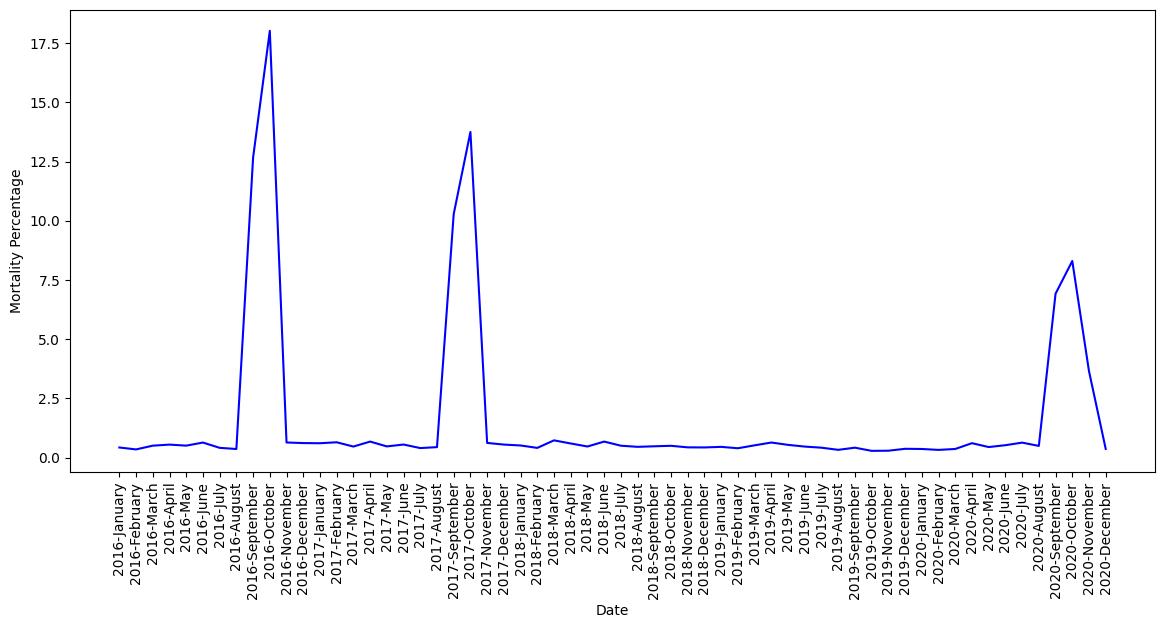

In [27]:
plt.figure(figsize=[14,6])
sns.lineplot(data = df3, x = "Date", y = "Percentage", color= "blue")
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Mortality Percentage")
plt.show()

Mortatility per Region

In [28]:
ratios_per_region = []
for region in unique_region:
    reg_filt = df["Region"] == region
    case_per_region = df2[reg_filt]["Dengue Cases"].sum()
    death_per_region = df2[reg_filt]["Deaths"].sum()
    ratio_region = (death_per_region/case_per_region) *100
    ratios_per_region.append(ratio_region)

ratios_per_region

[0.2658043544509532,
 0.4275492346204116,
 0.3677592626503082,
 0.3999288470149483,
 0.42140750105351876,
 0.8345739161817115,
 1.5528875198897236,
 1.5901267584001157,
 1.1253679087393955,
 1.1134132814298572,
 1.0286643133544402,
 1.1838140335772707,
 4.675428915420889,
 2.7370866744113562,
 3.4561854336615907,
 3.29605650382578,
 2.877697841726619]

In [29]:
df4 = pd.DataFrame({"Region": unique_region, "Mortality": ratios_per_region})

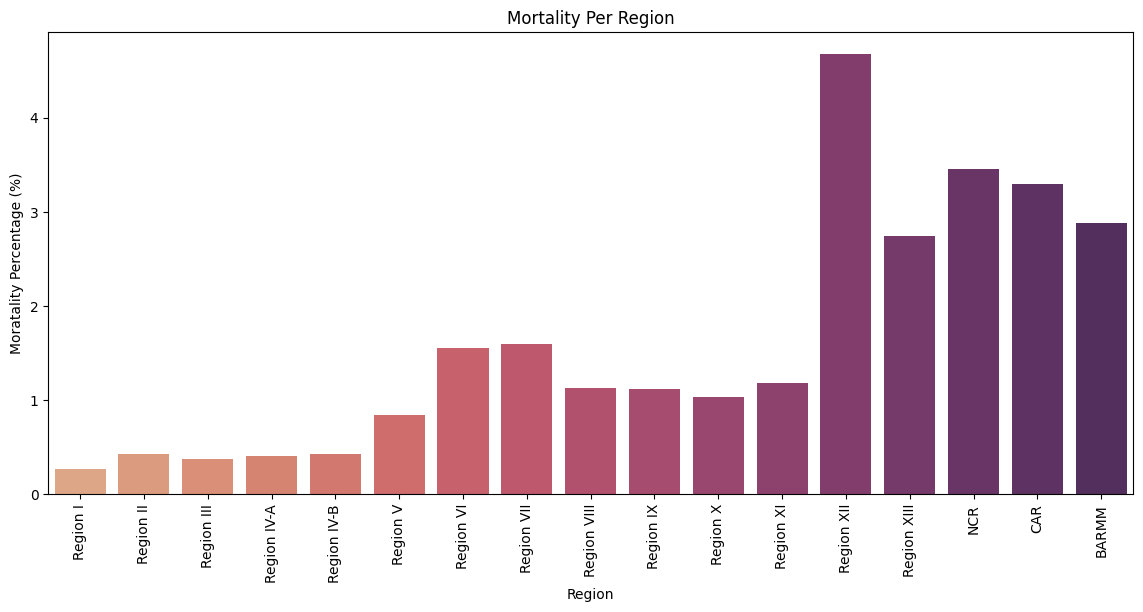

In [34]:
plt.figure(figsize=[14,6])
sns.barplot(data=df4, x = "Region", y = "Mortality", palette = "flare")
plt.xticks(rotation = 90)
plt.ylabel("Moratality Percentage (%)")
plt.title("Mortality Per Region")
plt.show()